### Feedforward Neural Network with Pytorch using CPU and GPU
#### Using Sigmoid, Tangent, and ReLU Activation Functions

<img src="images/1.png" width="500" height="300">

### Import Libraries

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import collections
import matplotlib.pyplot as plt
import numpy as np

### Load Datasets

In [2]:
# Get the training data set, train=True
# Make sure data is tesnor, transform=transforms.ToTensor()
# download if doesn't exist, download=True
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

In [3]:
# number of samples in the data set
len(train_dataset)

60000

In [4]:
# load the testing dataset
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [5]:
# number of samples in the data set
len(test_dataset)

10000

In [6]:
batch_size = 50
epochs = 20

In [7]:
accuracy_list = []
epoch_list = []
for i in range(0,epochs):
    epoch_list.append(i)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
isinstance(train_loader, collections.Iterable)

True

In [9]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
isinstance(test_loader, collections.Iterable)

True

### Build Model

In [10]:
class FeedforwardNeuralNetwrokModel(nn.Module):
    def __init__ (self, input_size, hidden_size, output_size, activation_type="sigmoid"):
        super(FeedforwardNeuralNetwrokModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Non-linear functions
        self.activation_type = activation_type
        if self.activation_type == "sigmoid":
            self.sigmoid = nn.Sigmoid()
        elif self.activation_type == "tanh":
            self.tanh = nn.Tanh()
        elif self.activation_type == "relu":
            self.relu = nn.ReLU()
        # Linear function
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linear function
        if self.activation_type == "sigmoid":
            out = self.sigmoid(out)
        elif self.activation_type == "tanh":
            out = self.tanh(out)
        elif self.activation_type == "relu":
            out = self.relu(out)
        # Linar function
        out = self.fc2(out)
        return out

In [11]:
# input dimentiosn 28x28=784
# output dimentiosn 10x10

input_size = 784
hidden_size = 100
output_size = 10

In [12]:
use_cuda = True

In [13]:
model = FeedforwardNeuralNetwrokModel(input_size, hidden_size, output_size, "relu")

In [14]:
# move the model to GPU
if torch.cuda.is_available() and use_cuda:
    model.cuda()

In [15]:
loss_function = nn.CrossEntropyLoss()

In [16]:
learning_rate = 0.1

In [17]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
def calcuateAccuracy():
    correct = 0
    total = 0
        
    for images, labels in test_loader:
        # get all the images in the training data set
        if torch.cuda.is_available() and use_cuda:
            #move torch tensors to the GPU
            images = Variable(images.view(-1, 784).cuda())
        else:
            images = Variable(images.view(-1, 784))
        
        # get all the predictions for each class using the model
        all_predictions = model(images)
            
        # highest is the final prediction
        _, predictions = torch.max(all_predictions.data, 1)
       
        # total number of samples
        total = total + labels.size(0)
            
        # corrrect prediction
        # compare prediction with labels element wise
        # sum returned tensor (it has True/1 or False/0 in it)
        if torch.cuda.is_available() and use_cuda:
            correct = correct + (predictions.cpu() == labels.cpu()).sum()
        else:
            correct = correct + (predictions == labels).sum()
        
        correct_np = correct.numpy()
            
    accuracy = 100 * correct_np / total;
    print("accuracy: " + str(accuracy))
    return accuracy

In [19]:
def train():
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_loader):
            # get a batch of images and labels
            if torch.cuda.is_available() and use_cuda:
                #move torch tensors to the GPU
                images = Variable(images.view(-1, 784).cuda())
                labels = Variable(labels.cuda())
            else:
                images = Variable(images.view(-1, 784))
                labels = Variable(labels)

            # set gradients to 0
            optimizer.zero_grad()

            # get predictions for the batch
            predictions = model(images)

            # calculate loss
            loss = loss_function(predictions, labels)

            # calculate the gradients
            loss.backward()

            # update the weights
            optimizer.step()

        accuracy = calcuateAccuracy()
        accuracy_list.append(accuracy)

In [20]:
def plot():
    plt.clf()
    plt.plot(epoch_list, accuracy_list, '-', alpha=0.5)
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.xticks(epoch_list) 
    plt.yticks(np.arange(min(accuracy_list)-min(accuracy_list)%5, max(accuracy_list), 5)) 
    plt.show()

In [21]:
train()

accuracy: 93.22
accuracy: 94.97
accuracy: 95.95
accuracy: 96.38
accuracy: 96.86
accuracy: 97.13
accuracy: 97.27
accuracy: 97.29
accuracy: 97.31
accuracy: 97.42
accuracy: 97.63
accuracy: 97.49
accuracy: 97.7
accuracy: 97.68
accuracy: 97.76
accuracy: 97.72
accuracy: 97.87
accuracy: 97.74
accuracy: 97.84
accuracy: 97.79


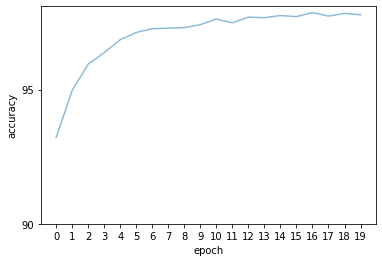

In [22]:
plot()